In [1]:
source('~/canonades/RcisTarget/src/RCTpipe.r', echo = T, verbose = T)

'envir' chosen:<environment: R_GlobalEnv>
encoding = "native.enc" chosen
--> parsed 32 expressions; now eval(.)ing them:

>>>> eval(expression_nr. 1 )

> Sys.setenv(LOG_LEVEL = "TRACE")
curr.fun: symbol Sys.setenv
 .. after ‘expression(Sys.setenv(LOG_LEVEL = "TRACE"))’

>>>> eval(expression_nr. 2 )

> Sys.getenv("R_HOME")
curr.fun: symbol Sys.getenv
[1] "/users/genomics/xoel/micromamba/envs/biobox/lib/R"
 .. after ‘expression(Sys.getenv("R_HOME"))’

>>>> eval(expression_nr. 3 )

> PAR_METHOD <- "iCisTarget"
curr.fun: symbol <-
 .. after ‘expression(PAR_METHOD <- "iCisTarget")’

>>>> eval(expression_nr. 4 )

> PAR_SEARCH_RANGE <- "long"
curr.fun: symbol <-
 .. after ‘expression(PAR_SEARCH_RANGE <- "long")’

>>>> eval(expression_nr. 5 )

> PAR_MOTIF_NES <- 3
curr.fun: symbol <-
 .. after ‘expression(PAR_MOTIF_NES <- 3)’

>>>> eval(expression_nr. 6 )

> PAR_MOTIF_DB_V <- "V10"
curr.fun: symbol <-
 .. after ‘expression(PAR_MOTIF_DB_V <- "V10")’

>>>> eval(expression_nr. 7 )

> PAR_DB_DIR <

### Parameters, files and dirs

In [2]:
# Input file
input.fname <- 'data/gene_disorder_associations.intersectionExpData.csv'

# Results directory
results.dir <- './results/RCT_diseases/'

In [3]:
# Number of cores
n.cores <- parallel::detectCores()
# Number of permutations
n.perms <- 1000

In [4]:
# Expression data for bicorrelations
# exp.fname <- 'data/nico_expression_log2.onlyExpressed.csv'
exp.fname <- 'data/nico_expression_log2.original_genes.csv'

# Data

In [5]:
diseases.df <- read.csv(input.fname, row.names=1)
dim(diseases.df)
head(diseases.df)

[1] 19939    19

Microcephaly Hydrocephaly RareMCD MDD_2018 Polymicrogyria SCZ_2020
SLC25A27 0            0            0       0        0              0       
EXOC6B   0            0            0       0        0              0       
RBM4B    0            0            0       0        0              0       
NACC1    0            0            0       0        0              0       
TSPAN7   0            0            0       0        0              0       
MUC12    0            0            0       0        0              0       
         AN_2019 NEUROT_2018 PD_2014 AD_2019 Lissencephaly BD_2019 DevDyslexia
SLC25A27 0       0           0       0       0             0       0          
EXOC6B   0       0           0       0       0             0       0          
RBM4B    0       0           0       0       0             1       0          
NACC1    0       0           0       0       0             0       0          
TSPAN7   0       0           0       0       0             0       0          
MUC12    0       0           0       0       0             0       0          
         Heterotopia ADHD_2019 DD FCDandmTOR Cobblestone ASD
SLC25A27 0           0         0  0          0           1  
EXOC6B   0           0         0  0          0           1  
RBM4B    0           0         0  0          0           0  
NACC1    0           0         0  0          0           1  
TSPAN7   0           0         0  0          0           1  
MUC12    0           0         0  0          0           1

In [6]:
exp.data <- read.csv(exp.fname, row.names=1)
dim(exp.data)
head(exp.data)

[1] 19939    20

P2.FGF20 P2.FGF10 P2.FGF1  P2.FGF0.1 P3.FGF20 P3.FGF10 P3.FGF1 
RPPH1    13.04623 12.28241 11.24364 12.27173  12.12812 12.03452 13.00799
RMRP     12.48491 12.11243 11.38070 12.09172  12.34055 12.44420 13.10532
EEF1A1   11.62933 11.59329 11.66738 11.63242  11.68348 11.69902 11.56305
RPS27    10.51746 11.34083 11.32416 11.54350  11.45687 11.54094 11.09534
HIST1H4E 11.86527 10.61179 10.55470 10.90878  11.08158 10.89391 11.72504
RPL23    11.09727 11.02227 11.07019 11.00418  10.98213 10.96352 10.80222
         P3.FGF0.1 P4.FGF20 P4.FGF10 P4.FGF1  P4.FGF0.1 P6.FGF20 P6.FGF10
RPPH1    12.17872  12.05932 11.86173 11.98733 11.62126  12.00351 12.63748
RMRP     12.28078  12.08826 11.46426 11.66939 11.90056  11.91875 11.97331
EEF1A1   11.34799  11.76610 11.79932 11.75743 11.05350  11.49185 11.69776
RPS27    11.39159  11.34469 11.30040 11.33700 10.87653  11.00994 10.38989
HIST1H4E 10.57039  11.11413 10.92014 11.03981 10.98338  11.24872 12.17598
RPL23    10.86794  10.96422 11.07841 11.12587 10.65969  10.70524 11.06947
         P6.FGF1  P6.FGF0.1 P8.FGF20 P8.FGF10 P8.FGF1  P8.FGF0.1
RPPH1    11.93306 12.33148  12.23537 12.43607 12.59975 12.52714 
RMRP     11.51441 11.98859  11.76499 12.19002 12.34510 12.08683 
EEF1A1   11.58537 11.67830  11.39488 11.75448 11.73382 11.78609 
RPS27    11.26149 11.32254  10.69421 11.16709 11.29963 11.25599 
HIST1H4E 10.92614 10.78664  10.62988 10.98815 10.69400 10.27310 
RPL23    11.07815 10.82535  10.72543 10.96961 10.94586 10.90868

# Run

### Regulons

In [7]:
RCT <- run_pipe(
    genes.df = diseases.df,
    ncores = n.cores
)

2024-05-04 22:44:52 [INFO] Motif-TF DB already downloaded
2024-05-04 22:44:52 [INFO] Motif ranking DB already downloaded
2024-05-04 22:44:52 [INFO] Loading motif annotations...


ERROR: Error in loadNamespace(x): there is no package called ‘RcisTarget’


In [ ]:
save_RCT(RCT, save_dir = results.dir)

### Core-Target bicor

In [11]:
# RCT <- readRDS('results/RCT_diseases/cisTarget_results.rds')

In [21]:
RCT[['bicorRes']] <- compute_bicors(
    RCT_result=RCT,
    exp.data=exp.data,
    n.permutations = n.perms,
    ncores=n.cores)

2023-01-14 10:22:45 [DEBUG] [BICOR] geneSet ASD
2023-01-14 10:22:45 [DEBUG] [BICOR]    Core ARNT2
2023-01-14 10:22:45 [TRACE] Core in expression data: TRUE
2023-01-14 10:22:45 [TRACE] Targets not in expression data: 0
2023-01-14 10:23:49 [DEBUG] [BICOR]    Core CHD1
2023-01-14 10:23:49 [TRACE] Core in expression data: TRUE
2023-01-14 10:23:49 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:24:40 [DEBUG] [BICOR]    Core EGR3
2023-01-14 10:24:40 [TRACE] Core in expression data: TRUE
2023-01-14 10:24:40 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:25:32 [DEBUG] [BICOR]    Core EP300
2023-01-14 10:25:32 [TRACE] Core in expression data: TRUE
2023-01-14 10:25:32 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:26:26 [DEBUG] [BICOR]    Core GLIS1
2023-01-14 10:26:26 [TRACE] Core in expression data: TRUE
2023-01-14 10:26:26 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:27:18 [DEBUG] [BICOR]    Core GTF2I
2023-01-14 10:27:18 [TRACE] Core in expression data: TRUE
2023-01-14 10:27:18 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:28:11 [DEBUG] [BICOR]    Core KLF16
2023-01-14 10:28:11 [TRACE] Core in expression data: TRUE
2023-01-14 10:28:11 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:29:16 [DEBUG] [BICOR]    Core MTF1
2023-01-14 10:29:16 [TRACE] Core in expression data: TRUE
2023-01-14 10:29:16 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:30:09 [DEBUG] [BICOR]    Core PAX5
2023-01-14 10:30:09 [TRACE] Core in expression data: TRUE
2023-01-14 10:30:09 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:31:02 [DEBUG] [BICOR]    Core SIN3A
2023-01-14 10:31:02 [TRACE] Core in expression data: TRUE
2023-01-14 10:31:02 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:31:56 [DEBUG] [BICOR]    Core TAF1
2023-01-14 10:31:56 [TRACE] Core in expression data: TRUE
2023-01-14 10:31:56 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:32:49 [DEBUG] [BICOR]    Core THRA
2023-01-14 10:32:49 [TRACE] Core in expression data: TRUE
2023-01-14 10:32:49 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:33:43 [DEBUG] [BICOR]    Core VDR
2023-01-14 10:33:43 [TRACE] Core in expression data: TRUE
2023-01-14 10:33:43 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:34:37 [DEBUG] [BICOR]    Core VEZF1
2023-01-14 10:34:37 [TRACE] Core in expression data: TRUE
2023-01-14 10:34:37 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:35:43 [DEBUG] [BICOR]    Core YY1
2023-01-14 10:35:43 [TRACE] Core in expression data: TRUE
2023-01-14 10:35:43 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:36:35 [DEBUG] [BICOR] geneSet BD_2019
2023-01-14 10:36:35 [DEBUG] [BICOR]    Core ZNF101
2023-01-14 10:36:35 [TRACE] Core in expression data: TRUE
2023-01-14 10:36:35 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:37:26 [DEBUG] [BICOR] geneSet DD
2023-01-14 10:37:26 [DEBUG] [BICOR]    Core CNOT3
2023-01-14 10:37:26 [TRACE] Core in expression data: TRUE
2023-01-14 10:37:26 [TRACE] Targets not in expression data: 0
2023-01-14 10:38:18 [DEBUG] [BICOR]    Core CTCF
2023-01-14 10:38:18 [TRACE] Core in expression data: TRUE
2023-01-14 10:38:18 [TRACE] Targets not in expression data: 0
2023-01-14 10:39:11 [DEBUG] [BICOR]    Core EP300
2023-01-14 10:39:11 [TRACE] Core in expression data: TRUE
2023-01-14 10:39:11 [TRACE] Targets not in expression data: 0
2023-01-14 10:40:05 [DEBUG] [BICOR]    Core PURA
2023-01-14 10:40:05 [TRACE] Core in expression data: TRUE
2023-01-14 10:40:05 [TRACE] Targets not in expression data: 0
2023-01-14 10:40:59 [DEBUG] [BICOR] geneSet FCDandmTOR
2023-01-14 10:40:59 [DEBUG] [BICOR]    Core DLX2
2023-01-14 10:40:59 [TRACE] Core in expression data: TRUE
2023-01-14 10:40:59 [TRACE] Targets not in expression data: 0
2023-01-14 10:41:49 [DEBUG] [BICOR]    Core KLF4
20

Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:43:35 [DEBUG] [BICOR] geneSet Lissencephaly
2023-01-14 10:43:35 [DEBUG] [BICOR]    Core FOXG1
2023-01-14 10:43:35 [TRACE] Core in expression data: TRUE
2023-01-14 10:43:35 [TRACE] Targets not in expression data: 0
2023-01-14 10:44:25 [DEBUG] [BICOR] geneSet MDD_2018
2023-01-14 10:44:25 [DEBUG] [BICOR]    Core MEF2C
2023-01-14 10:44:25 [TRACE] Core in expression data: TRUE
2023-01-14 10:44:25 [TRACE] Targets not in expression data: 0
2023-01-14 10:45:16 [DEBUG] [BICOR] geneSet NEUROT_2018
2023-01-14 10:45:16 [DEBUG] [BICOR]    Core EP300
2023-01-14 10:45:16 [TRACE] Core in expression data: TRUE
2023-01-14 10:45:16 [TRACE] Targets not in expression data: 0


Warning message in bicor(x, y, use = use, ...):
“bicor: zero MAD in variable 'y'. Pearson correlation was used for individual columns with zero (or missing) MAD.”


2023-01-14 10:46:09 [DEBUG] [BICOR]    Core GLIS3
2023-01-14 10:46:09 [TRACE] Core in expression data: TRUE
2023-01-14 10:46:09 [TRACE] Targets not in expression data: 0
2023-01-14 10:47:01 [DEBUG] [BICOR]    Core GTF2IRD1
2023-01-14 10:47:01 [TRACE] Core in expression data: TRUE
2023-01-14 10:47:01 [TRACE] Targets not in expression data: 0
2023-01-14 10:47:52 [DEBUG] [BICOR] geneSet SCZ_2020
2023-01-14 10:47:52 [DEBUG] [BICOR]    Core FOXO3
2023-01-14 10:47:52 [TRACE] Core in expression data: TRUE
2023-01-14 10:47:52 [TRACE] Targets not in expression data: 0
2023-01-14 10:48:44 [DEBUG] [BICOR]    Core KLF6
2023-01-14 10:48:44 [TRACE] Core in expression data: TRUE
2023-01-14 10:48:44 [TRACE] Targets not in expression data: 0
2023-01-14 10:49:37 [DEBUG] [BICOR]    Core SP4
2023-01-14 10:49:37 [TRACE] Core in expression data: TRUE
2023-01-14 10:49:37 [TRACE] Targets not in expression data: 0


In [22]:
save_RCT(RCT, save_dir = results.dir)

2023-01-14 10:50:39 [INFO] Saving RCT to ./results/RCT_diseases/
2023-01-14 10:50:39 [INFO] Saving results without permutations
2023-01-14 10:52:57 [INFO] Saving results of bicorrelations


### Permutations of cores

In [7]:
# RCT <- readRDS('results/RCT_diseases/cisTarget_results.rds')

Warning message in readRDS("results/RCT_diseases/cisTarget_results.rds"):
“cannot unserialize ALTVEC object of class 'arrow::array_string_vector' from package 'arrow'; returning length zero vector”


In [17]:
RCT.perm <- permute_RCT(
    RCT,
    n.permutations = n.perms
    # n.permutations = 3
)

Number of genesets to permute: 9



2023-01-13 17:05:03 [INFO] Running RcisTarget
2023-01-13 17:05:03 [DEBUG] 1/4


Using 80 cores.



2023-01-13 17:07:08 [DEBUG] 2/4


Using BiocParallel...



2023-01-13 17:08:18 [DEBUG] 3/4
[1] 27090
2023-01-14 05:03:49 [DEBUG] 4/4
2023-01-14 05:03:50 [DEBUG] Time difference of 11.97973 hours


`summarise()` has grouped output by 'geneSet'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'geneSet'. You can override using the
`.groups` argument.


In [24]:
save_RCT(RCT.perm, save_dir = results.dir)

2023-01-14 11:15:21 [INFO] Saving RCT to ./results/RCT_diseases/
2023-01-14 11:15:21 [INFO] Saving permutated results
2023-01-14 11:20:15 [INFO] Saving results of bicorrelations


In [8]:
unique(RCT.perm$regulonTblPvals[,c('geneSet', 'Core', 'TFperm_counts', 'TFperm_pval.nom')])

ERROR: Error in unique(RCT.perm$regulonTblPvals[, c("geneSet", "Core", "TFperm_counts", : object 'RCT.perm' not found


### Supplementary table 4  
We want a table of the disease regulons, permutations of cores, bicors, and bicor pvalues  

In [28]:
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [8]:
RCT <- readRDS('results/RCT_diseases/cisTarget_results.permuted.rds')

Warning message in readRDS("results/RCT_diseases/cisTarget_results.permuted.rds"):
“cannot unserialize ALTVEC object of class 'arrow::array_string_vector' from package 'arrow'; returning length zero vector”


In [65]:
dfs <- list(
    'Disease regulons' = RCT$regulonTbl,
    'Core TF permutations' = RCT$permutations$perm.cores[,1:4] %>% rename(Core=TF_highConf),
    'Core-Target exp.corr.' = RCT$bicorRes$bicorRes %>% select(geneSet, Core, Target, bicor, bicor.p) %>% rename(pvalue=bicor.p),
    'Exp. corr. permutations' = RCT$bicorRes$bicorSummary %>% select(geneSet, Core, n.sign.pos, n.sign.pos.pval, n.sign.neg, n.sign.neg.pval)
)

dfs$`Disease regulons` <- merge(dfs$`Disease regulons`, dfs$`Core-Target exp.corr.`, by=c('geneSet', 'Core', 'Target'), all=T)  %>% rename(core_target.exp.cor = bicor, exp.cor.pvalue=pvalue)
dfs$`Core-Target exp.corr.` <- NULL
dfs$`Disease regulons`[,c('geneSet', 'Core')] %>% unique %>% apply(1, paste0, collapse=' ') -> gs.core.uniques
dfs$`Core TF permutations` <- dfs$`Core TF permutations`[dfs$`Core TF permutations`[,c('geneSet', 'Core')] %>% 
                                                         apply(1, paste0, collapse=' ') %in% gs.core.uniques,] %>% 
    rename(n.obs.in.perm = TFperm_counts, pvalue=TFperm_pval.nom)
dfs$`Exp. corr. permutations`

openxlsx::write.xlsx(x = dfs, file = 'results/supp_table.4.Disease_regulons_Correlations_and_Permutations.xlsx')



geneSet       Core     n.sign.pos n.sign.pos.pval
ASD ARNT2            ASD           ARNT2     57        0.000          
ASD CHD1             ASD           CHD1      98        0.000          
ASD EGR3             ASD           EGR3      56        0.000          
ASD EP300            ASD           EP300     50        0.001          
ASD GLIS1            ASD           GLIS1     21        0.034          
ASD GTF2I            ASD           GTF2I     53        0.000          
ASD KLF16            ASD           KLF16     43        0.736          
ASD MTF1             ASD           MTF1      73        0.000          
ASD PAX5             ASD           PAX5     102        0.000          
ASD SIN3A            ASD           SIN3A     72        0.297          
ASD TAF1             ASD           TAF1      84        0.000          
ASD THRA             ASD           THRA      60        0.020          
ASD VDR              ASD           VDR        0        0.948          
ASD VEZF1            ASD           VEZF1    104        0.000          
ASD YY1              ASD           YY1        7        0.221          
BD_2019 ZNF101       BD_2019       ZNF101     3        0.491          
DD CNOT3             DD            CNOT3      7        0.506          
DD CTCF              DD            CTCF      11        0.001          
DD EP300             DD            EP300     10        0.005          
DD PURA              DD            PURA      20        0.000          
FCDandmTOR DLX2      FCDandmTOR    DLX2       1        0.406          
FCDandmTOR KLF4      FCDandmTOR    KLF4       5        0.429          
Hydrocephaly SKI     Hydrocephaly  SKI        1        0.184          
Lissencephaly FOXG1  Lissencephaly FOXG1      0        0.234          
MDD_2018 MEF2C       MDD_2018      MEF2C      2        0.076          
NEUROT_2018 EP300    NEUROT_2018   EP300      5        0.642          
NEUROT_2018 GLIS3    NEUROT_2018   GLIS3      1        0.630          
NEUROT_2018 GTF2IRD1 NEUROT_2018   GTF2IRD1   5        0.878          
SCZ_2020 FOXO3       SCZ_2020      FOXO3     13        0.000          
SCZ_2020 KLF6        SCZ_2020      KLF6      13        0.020          
SCZ_2020 SP4         SCZ_2020      SP4        6        0.326          
                     n.sign.neg n.sign.neg.pval
ASD ARNT2            23         0.678          
ASD CHD1             57         0.346          
ASD EGR3             31         0.029          
ASD EP300             6         0.865          
ASD GLIS1            14         0.905          
ASD GTF2I            26         0.583          
ASD KLF16            65         0.000          
ASD MTF1             23         0.371          
ASD PAX5             82         0.024          
ASD SIN3A            94         0.000          
ASD TAF1             39         0.763          
ASD THRA             82         0.000          
ASD VDR               0         0.730          
ASD VEZF1            29         0.962          
ASD YY1               4         0.992          
BD_2019 ZNF101        3         0.105          
DD CNOT3             10         0.005          
DD CTCF               8         0.009          
DD EP300              2         0.172          
DD PURA               6         0.675          
FCDandmTOR DLX2       3         0.008          
FCDandmTOR KLF4       6         0.186          
Hydrocephaly SKI      1         0.211          
Lissencephaly FOXG1   0         0.247          
MDD_2018 MEF2C        1         0.551          
NEUROT_2018 EP300     0         0.918          
NEUROT_2018 GLIS3     3         0.003          
NEUROT_2018 GTF2IRD1 10         0.000          
SCZ_2020 FOXO3        9         0.607          
SCZ_2020 KLF6        11         0.601          
SCZ_2020 SP4          3         0.313

# Explore

In [9]:
library(dplyr)

Warning message:
“package ‘dplyr’ was built under R version 4.2.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [7]:
RCT <- readRDS('results/RCT_diseases/cisTarget_results.rds')

Warning message in readRDS("results/RCT_diseases/cisTarget_results.rds"):
“cannot unserialize ALTVEC object of class 'arrow::array_string_vector' from package 'arrow'; returning length zero vector”


### FOXG1

In [10]:
subset(RCT$motifEnrichmentTable, grepl('FOXG1', TF_highConf, fixed=T))$geneSet %>% unique()

[1] "Hydrocephaly"  "AN_2019"       "Lissencephaly" "Cobblestone"

In [11]:
subset(RCT$motifEnrichmentTable, grepl('FOXG1', TF_highConf, fixed=T))

logo                                                                                                                           
1 <img src="http://motifcollections.aertslab.org/v9/logos/metacluster_188.5.png" height="52" alt="metacluster_188.5"></img>      
2 <img src="http://motifcollections.aertslab.org/v9/logos/transfac_pro__M01216.png" height="52" alt="transfac_pro__M01216"></img>
3 <img src="http://motifcollections.aertslab.org/v9/logos/tfdimers__MD00221.png" height="52" alt="tfdimers__MD00221"></img>      
4 <img src="http://motifcollections.aertslab.org/v9/logos/tfdimers__MD00430.png" height="52" alt="tfdimers__MD00430"></img>      
5 <img src="http://motifcollections.aertslab.org/v9/logos/transfac_pro__M01216.png" height="52" alt="transfac_pro__M01216"></img>
  geneSet       motif                NES  AUC   
1 Hydrocephaly  metacluster_188.5    4.14 0.0880
2 Hydrocephaly  transfac_pro__M01216 3.91 0.0845
3 AN_2019       tfdimers__MD00221    3.40 0.0422
4 Lissencephaly tfdimers__MD00430    3.56 0.0913
5 Cobblestone   transfac_pro__M01216 4.08 0.0970
  TF_highConf                                                                                                                                                                                                                     
1 FOXA1; FOXA2; FOXA2; FOXA3; FOXD3; FOXD3; FOXF1; FOXF1; FOXF1; FOXF1; FOXF2; FOXG1; FOXH1; FOXI1; FOXI1; FOXI1; FOXJ1; FOXJ2; FOXL1; FOXO1; FOXO3; FOXO4; FOXO4; FOXQ1 (directAnnotation); FOXK1; FOXL2 (inferredBy_Orthology); 
2 FOXG1; FOXO1 (directAnnotation);                                                                                                                                                                                                
3 FOXG1; FOXO1; GABPA (directAnnotation);                                                                                                                                                                                         
4 FOXG1; FOXO1; TCF7L2 (directAnnotation);                                                                                                                                                                                        
5 FOXG1; FOXO1 (directAnnotation);                                                                                                                                                                                                
  TF_lowConf                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [20]:
longMotifEnrTbl <- tidyr::separate_rows(RCT$motifEnrichmentTable, 
    TF_highConf, sep = ";")

longMotifEnrTbl$TF_directAnnotation <- grepl("directAnnotation", 
    longMotifEnrTbl$TF_highConf, fixed = T)

longMotifEnrTbl <- longMotifEnrTbl[sapply(longMotifEnrTbl$TF_highConf, 
    nchar) != 1, ]

longMotifEnrTbl$TF_highConf <- gsub("\\s*\\([^\\)]+\\)", 
    "", longMotifEnrTbl$TF_highConf)

longMotifEnrTbl$TF_highConf <- gsub(" ", "", longMotifEnrTbl$TF_highConf, 
    fixed = T)

longMotifEnrTbl$TF_inGeneList <- apply(longMotifEnrTbl, 1, 
    function(x) {
        x["TF_highConf"] %in% RCT$geneLists[[x["geneSet"]]]
    })
longMotifEnrTbl <- tidyr::separate_rows(longMotifEnrTbl, 
    enrichedGenes, sep = ";")

In [34]:
rct_grns <- unique(longMotifEnrTbl[,c('geneSet', 'TF_highConf', 'enrichedGenes')]) %>% mutate(source=TF_highConf, target=enrichedGenes, Disease=geneSet, TF_highConf=NULL, enrichedGenes=NULL, geneSet=NULL)

In [114]:
foxg1_regulon <- subset(rct_grns, (source == 'FOXG1') | (target == 'FOXG1'))

first_contacts <- unique(c(foxg1_regulon$source, foxg1_regulon$target, recursive = T))
foxg1_regulon_exp <- subset(rct_grns, (source %in% first_contacts) & (target %in% first_contacts))

grouped_foxg1_regulon <- foxg1_regulon%>%group_by(source, target) %>% summarise(Diseases=paste(sort(unique(Disease)), collapse=','))
grouped_foxg1_regulon_exp <- foxg1_regulon_exp%>%group_by(source, target) %>% summarise(Diseases=paste(sort(unique(Disease)), collapse=','))

`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'source'. You can override using the
`.groups` argument.


In [115]:
library(igraph)

g <- graph_from_data_frame(foxg1_regulon)
g_exp <- graph_from_data_frame(foxg1_regulon_exp)
g_grouped <- graph_from_data_frame(grouped_foxg1_regulon)
g_grouped_exp <- graph_from_data_frame(grouped_foxg1_regulon_exp)

In [108]:
rbind(foxg1_regulon %>% mutate(gene=source, target=NULL, source=NULL),
      foxg1_regulon %>% mutate(gene=target, target=NULL, source=NULL)) %>% 
    unique() %>% reshape2::dcast(formula = 'Disease ~ gene', fun.aggregate = length) -> values.pie
values.pie[is.na(values.pie)] <- 0
rownames(values.pie) <- values.pie$Disease
values.pie <- values.pie %>% mutate(Disease=NULL) %>% t()


Using gene as value column: use value.var to override.



In [132]:
dis.colors <- setNames(c(
    '#ffbb78', # AN
    '#bcbd22', # ASD
    '#1400ff', # Cob, new color
    '#00977b', # DD
    '#1a5354', # Hydro
    '#17becf' # Lis
), colnames(values.pie))
dis.colors

AN_2019           ASD   Cobblestone            DD  Hydrocephaly 
    "#ffbb78"     "#bcbd22"     "#1400ff"     "#00977b"     "#1a5354" 
Lissencephaly 
    "#17becf"

In [141]:
library(ggplot2)

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”


Using gene as id variables



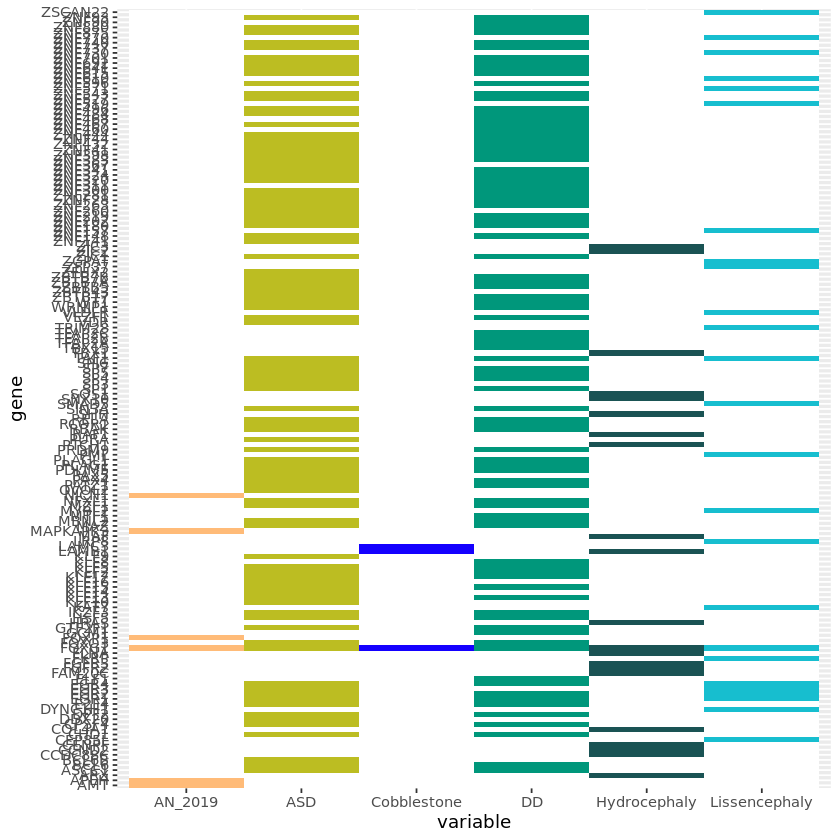

In [145]:
ggplot(
    as.data.frame(values.pie) %>% mutate(
        gene=rownames(values.pie)
        ) %>% reshape2::melt() %>% mutate(value = ifelse(value==1, dis.colors[variable], '#FFFFFF'))) + 
    geom_tile(aes(y=gene, x=variable, fill=value)) + scale_fill_identity() 

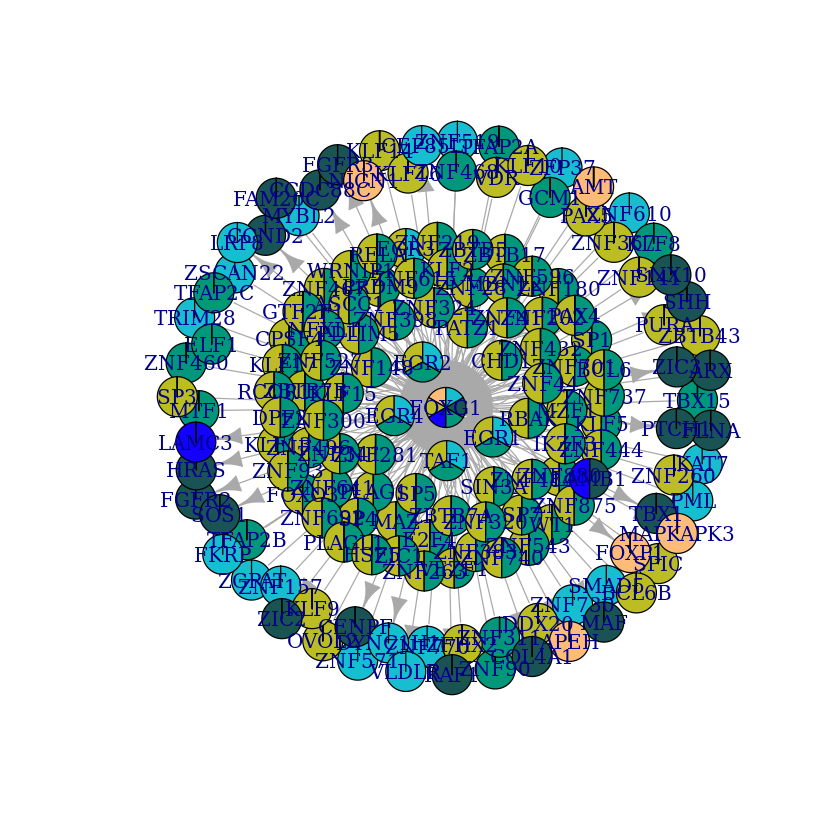

In [133]:
# g <- make_ring(10)
# values <- lapply(1:10, function(x) sample(1:10,3))
plot(g, layout=layout_with_fr,
     vertex.shape="pie", 
     vertex.pie=lapply(V(g)$name, function(x){values.pie[x,]}),
     vertex.pie.color=list(dis.colors))

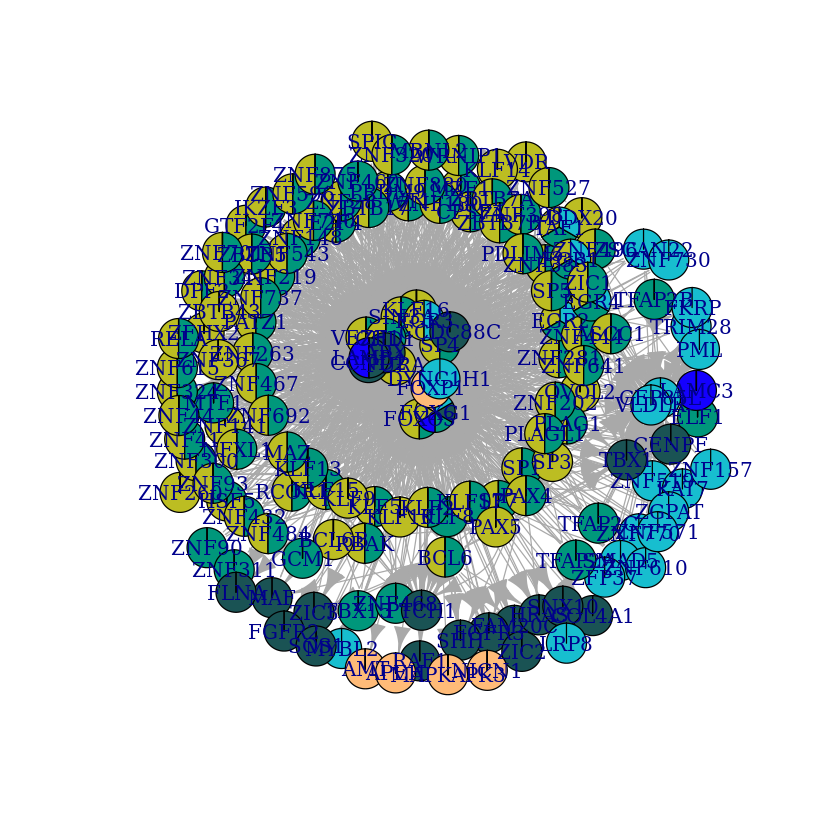

In [134]:
# g <- make_ring(10)
# values <- lapply(1:10, function(x) sample(1:10,3))
plot(g_exp, layout=layout_components,
     vertex.shape="pie", 
     vertex.pie=lapply(V(g_exp)$name, function(x){values.pie[x,]}),
     vertex.pie.color=list(dis.colors))

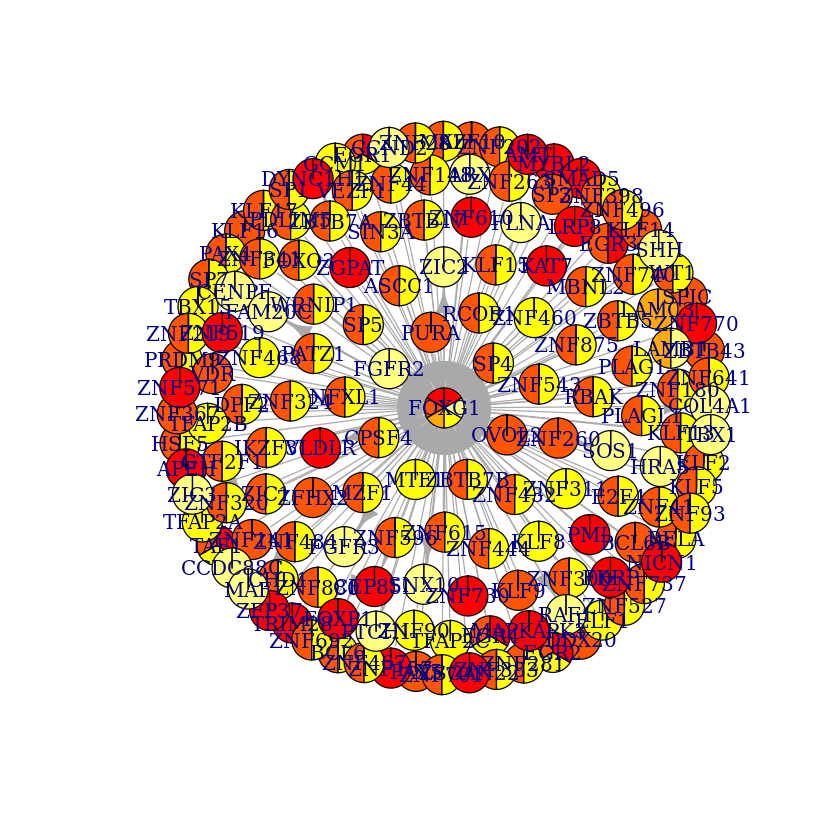

In [113]:
# g <- make_ring(10)
# values <- lapply(1:10, function(x) sample(1:10,3))
plot(g_grouped, layout=layout_components,
     vertex.shape="pie", 
     vertex.pie=lapply(V(g_grouped)$name, function(x){values.pie[x,]}),
     vertex.pie.color=list(heat.colors(5)))

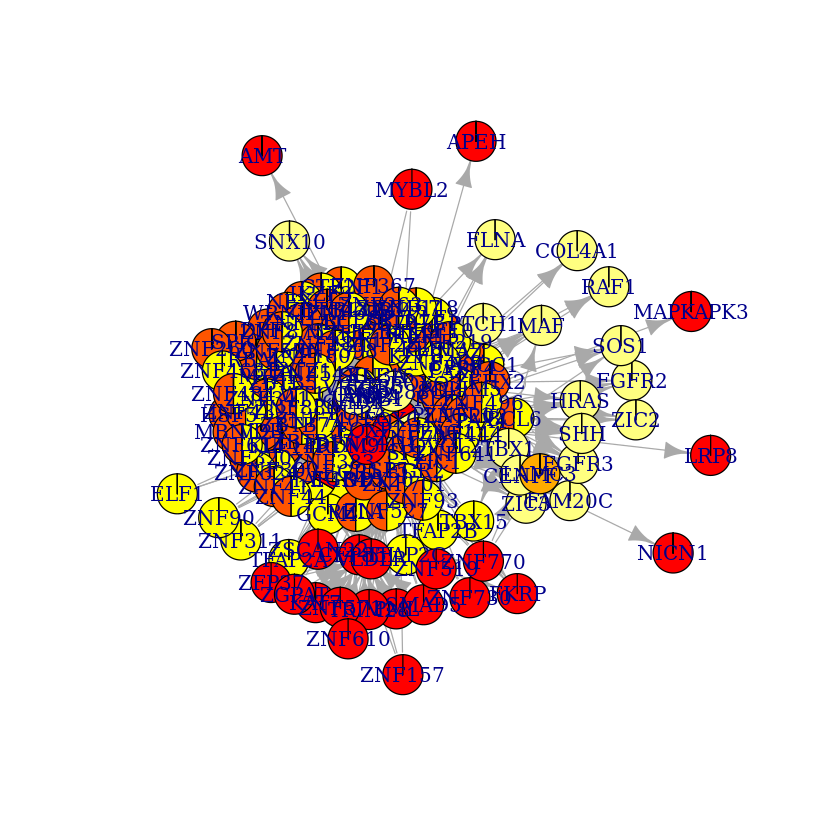

In [152]:
# g <- make_ring(10)
# values <- lapply(1:10, function(x) sample(1:10,3))
plot(g_grouped_exp, layout=layout_with_fr,
     vertex.shape="pie", 
     vertex.pie=lapply(V(g_grouped_exp)$name, function(x){values.pie[x,]}),
     vertex.pie.color=list(heat.colors(5)), vertex.label=NULL)

In [153]:
library(qgraph)

In [237]:
get_fr_layout <- function(g, area.fct=15, repulse.pwr=3.1){
    e <- get.edgelist(g,names=FALSE)

    l <- qgraph.layout.fruchtermanreingold(e, vcount=vcount(g),
                                           area=area.fct*(vcount(g)^2), 
                                           repulse.rad=(vcount(g)^repulse.pwr))    
    return(l)
}

In [238]:
options(repr.plot.height=15, repr.plot.width=15)

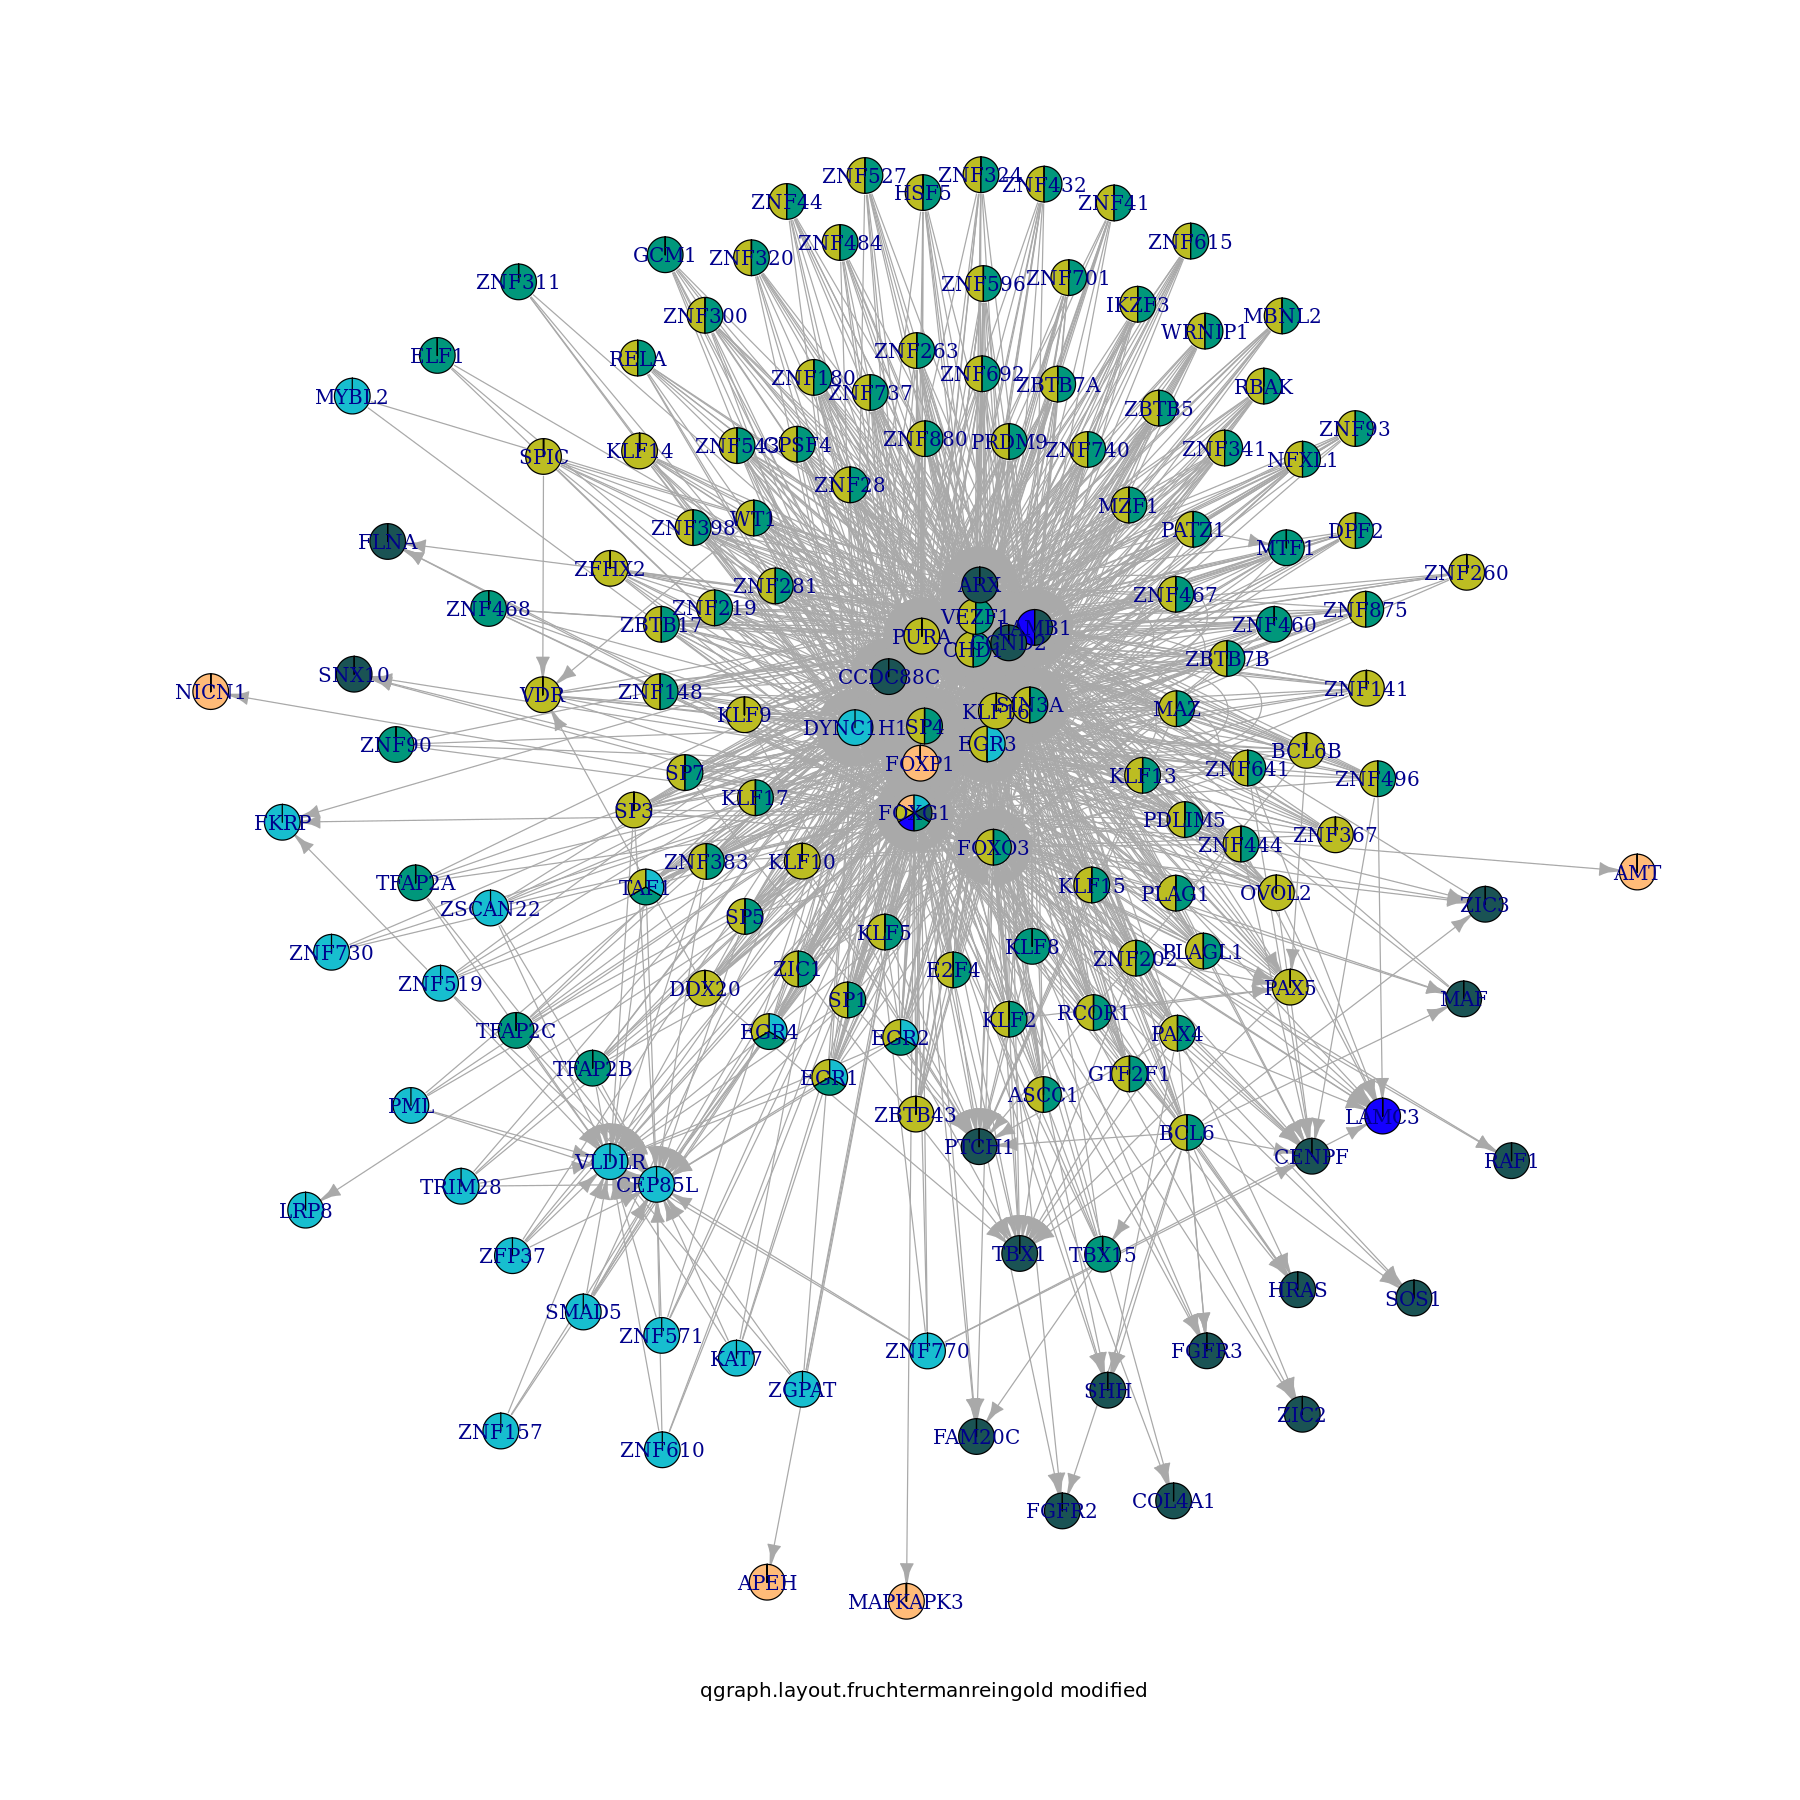

In [184]:
plot(g_grouped_exp,layout=get_fr_layout(g_grouped_exp),
     vertex.shape="pie", 
     vertex.pie=lapply(V(g_grouped_exp)$name, function(x){values.pie[x,]}),
     edge.arrow.size = 0.3,
     vertex.pie.color=list(dis.colors),
     vertex.size=5,
     # vertex.label=NA
    )
mtext("qgraph.layout.fruchtermanreingold modified", side=1)

In [189]:
V(g_grouped_exp)

+ 153/153 vertices, named, from c3887b0:
  [1] ASCC1    BCL6     BCL6B    CHD1     CPSF4    DDX20    DPF2     E2F4    
  [9] EGR1     EGR2     EGR3     EGR4     ELF1     FOXG1    FOXO3    FOXP1   
 [17] GCM1     GTF2F1   HSF5     IKZF3    KAT7     KLF10    KLF13    KLF14   
 [25] KLF15    KLF16    KLF17    KLF2     KLF5     KLF8     KLF9     MAF     
 [33] MAZ      MBNL2    MTF1     MYBL2    MZF1     NFXL1    OVOL2    PATZ1   
 [41] PAX4     PAX5     PDLIM5   PLAG1    PLAGL1   PML      PRDM9    PURA    
 [49] RBAK     RCOR1    RELA     SIN3A    SMAD5    SP1      SP3      SP4     
 [57] SP5      SP7      SPIC     TAF1     TBX1     TBX15    TFAP2A   TFAP2B  
 [65] TFAP2C   TRIM28   VDR      VEZF1    WRNIP1   WT1      ZBTB17   ZBTB43  
 [73] ZBTB5    ZBTB7A   ZBTB7B   ZFHX2    ZFP37    ZGPAT    ZIC1     ZIC3    
+ ... omitted several vertices

In [202]:
l <- get_fr_layout(g_grouped_exp)

rownames(l) <- V(g_grouped_exp)$name

l <- l[ V(g_grouped)$name,]

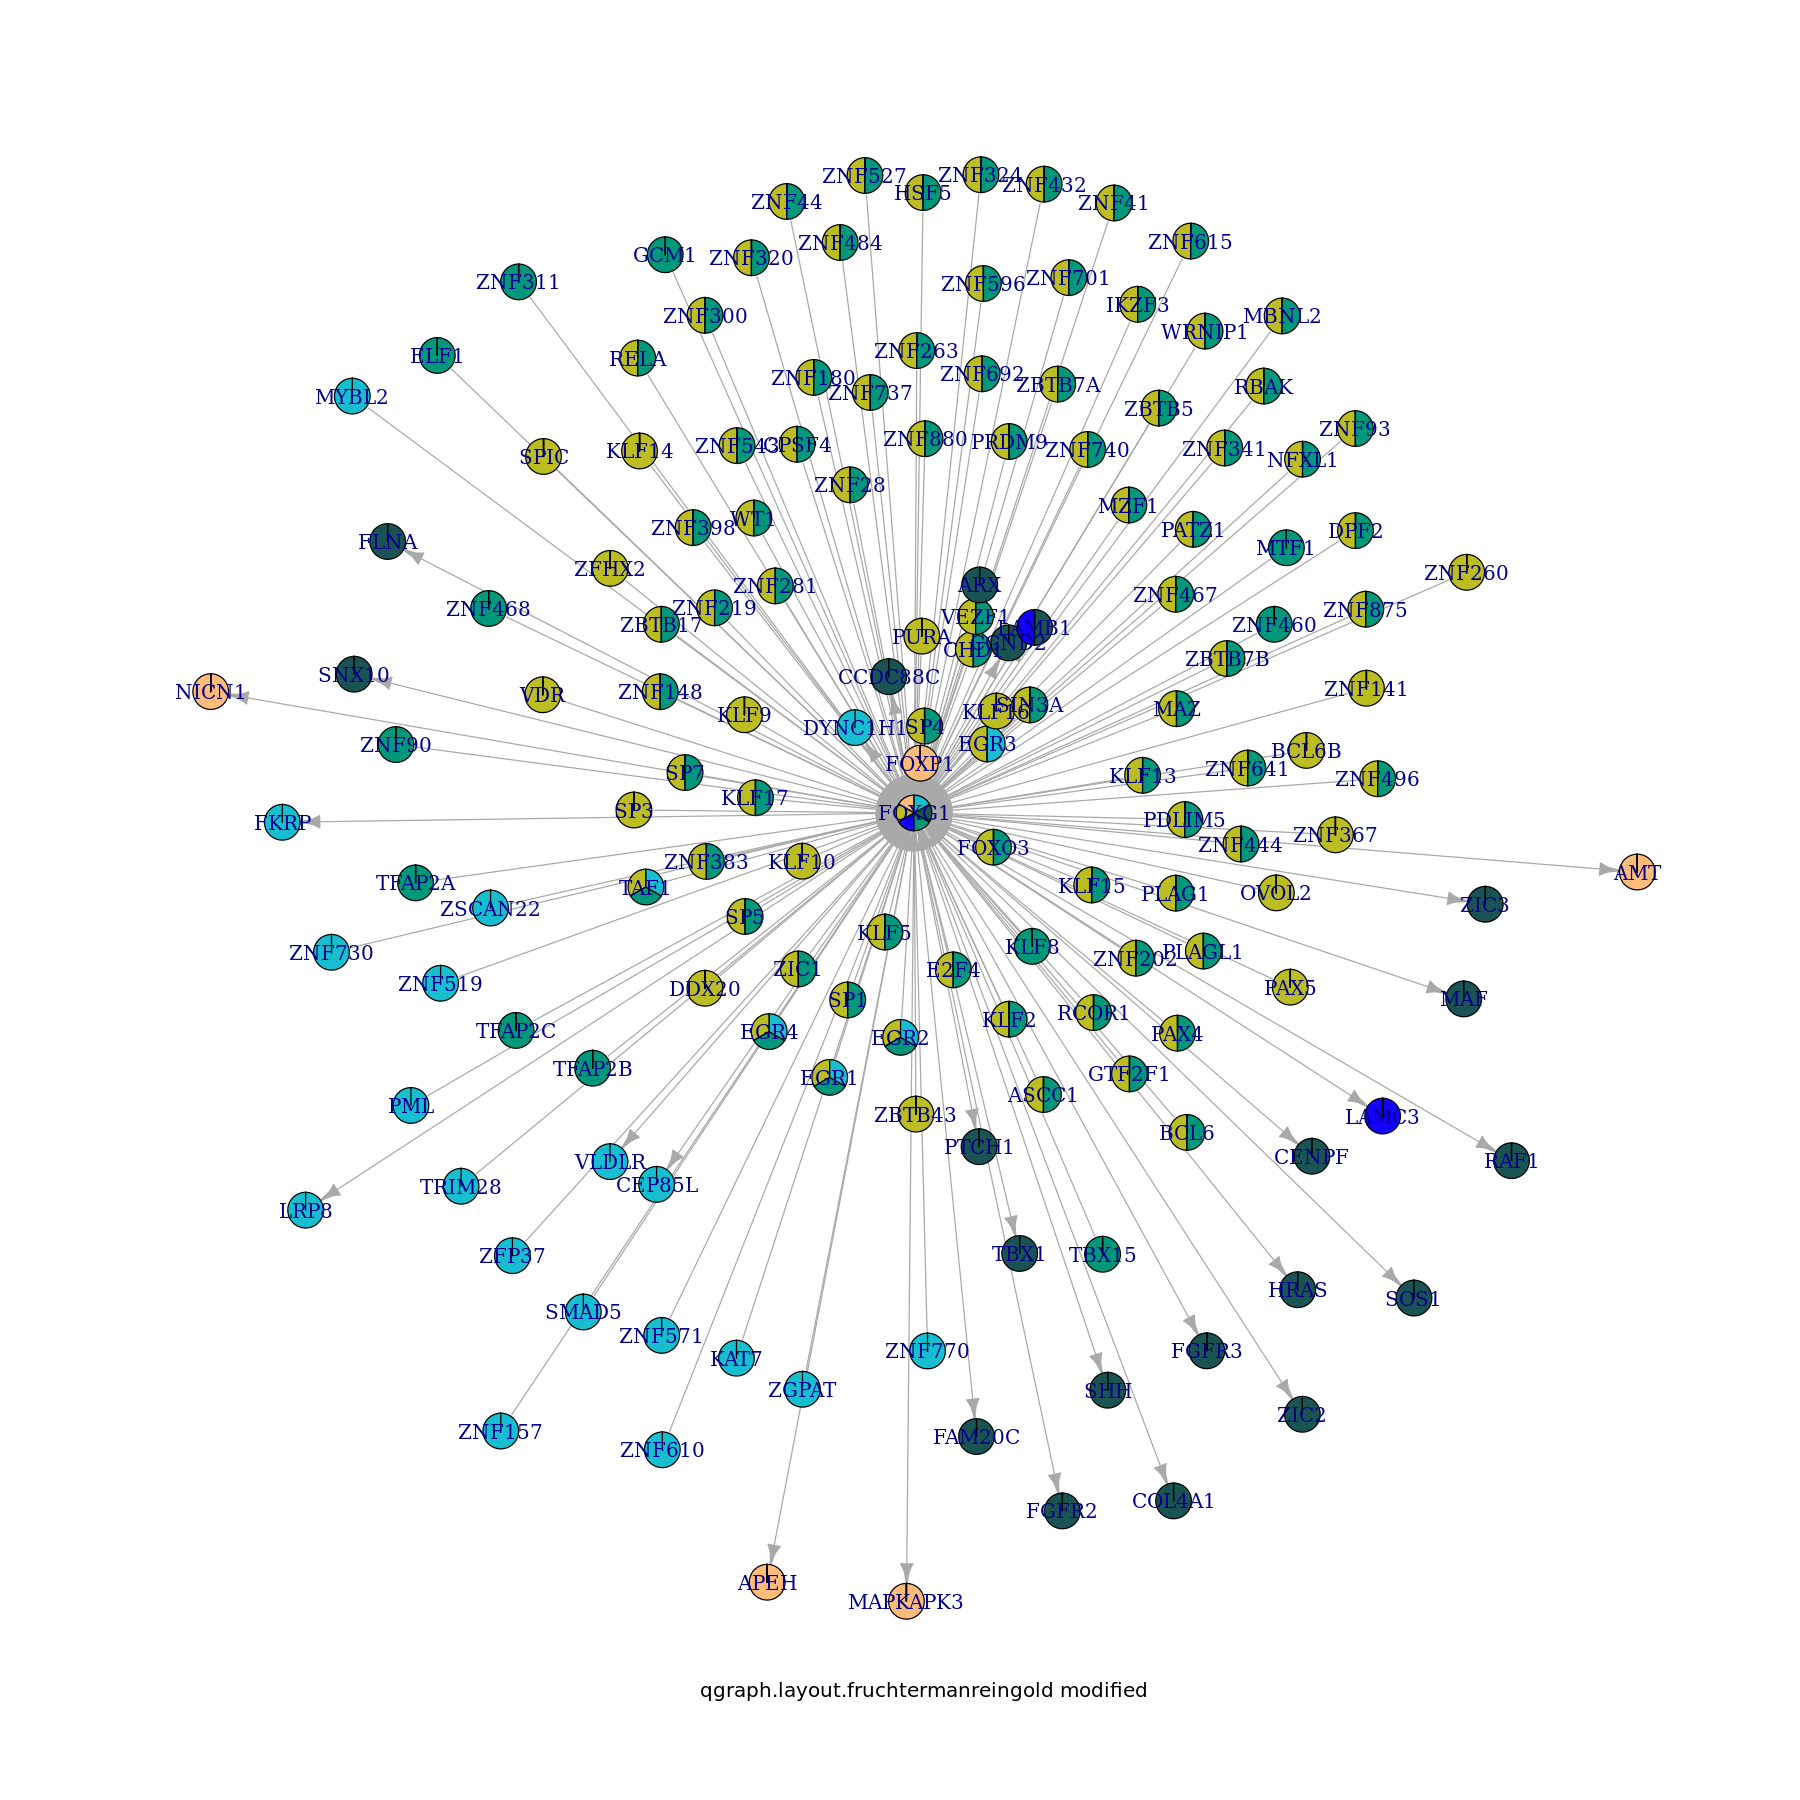

In [203]:
plot(g_grouped,layout=l,
     vertex.shape="pie", 
     vertex.pie=lapply(V(g_grouped)$name, function(x){values.pie[x,]}),
     edge.arrow.size = 0.3,
     vertex.pie.color=list(dis.colors),
     vertex.size=5,
     # vertex.label=NA
    )
mtext("qgraph.layout.fruchtermanreingold modified", side=1)

### All regulons!

In [209]:
regulons <- RCT$regulonTbl %>% group_by(Core, Target) %>% summarise(Diseases=paste(geneSet, collapse=', ')) %>% arrange(Diseases, Core, Target)

`summarise()` has grouped output by 'Core'. You can override using the
`.groups` argument.


In [212]:
g <- graph_from_data_frame(regulons)

In [218]:
dis.values <- as.matrix(diseases.df[V(g)$name, ])

In [233]:
reg.values <- RCT$regulonTbl %>% group_by(geneSet) %>% summarise(all_genes = unique(unlist(c(Core, Target, recursive = T))))
reg.values <- do.call('cbind', lapply(split(reg.values$all_genes, reg.values$geneSet), function(x) setNames(as.numeric(V(g)$name %in% x), V(g)$name)))

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'geneSet'. You can override using the
`.groups` argument.


In [239]:
load('~/codebases/cortical_disorders2/data/graphical.rda', verbose = T)

Loading objects:
  GeneAnnotation
  meta.colors
  facets


In [243]:
meta.colors$Disease[colnames(reg.values)]

ASD       BD_2019            DD    FCDandmTOR  Hydrocephaly 
    "#bcbd22"     "#cca38c"     "#00977b"     "#d844ab"     "#1a5354" 
Lissencephaly      MDD_2018   NEUROT_2018      SCZ_2020 
    "#17becf"     "#f399c0"     "#ff7f0e"     "#8c564b"

In [242]:
dis.colors

AN_2019           ASD   Cobblestone            DD  Hydrocephaly 
    "#ffbb78"     "#bcbd22"     "#1400ff"     "#00977b"     "#1a5354" 
Lissencephaly 
    "#17becf"

In [288]:
deg <- degree(g, mode="all")
deg <- scales::rescale(deg, from = c(1,quantile(deg, probs=.98)), to=c(1,5))
deg[deg>5] <- 5

In [304]:
sample.colors <- setNames(GeneAnnotation[V(g)$name, 'SampleColor' ], V(g)$name)
V(g)$color <- sample.colors

In [308]:
colnames(GeneAnnotation)

[1] "GeneHuman"       "PeakSample"      "SampleColor"     "PeakSampleFct"  
 [5] "CPN"             "SCP"             "CTH"             "E12"            
 [9] "E13"             "E14"             "E15"             "Day8"           
[13] "Day17"           "Day30"           "CPNColor"        "SCPColor"       
[17] "CTHColor"        "E12Color"        "E13Color"        "E14Color"       
[21] "E15Color"        "Day8Color"       "Day17Color"      "Day30Color"     
[25] "PeakSampleColor"

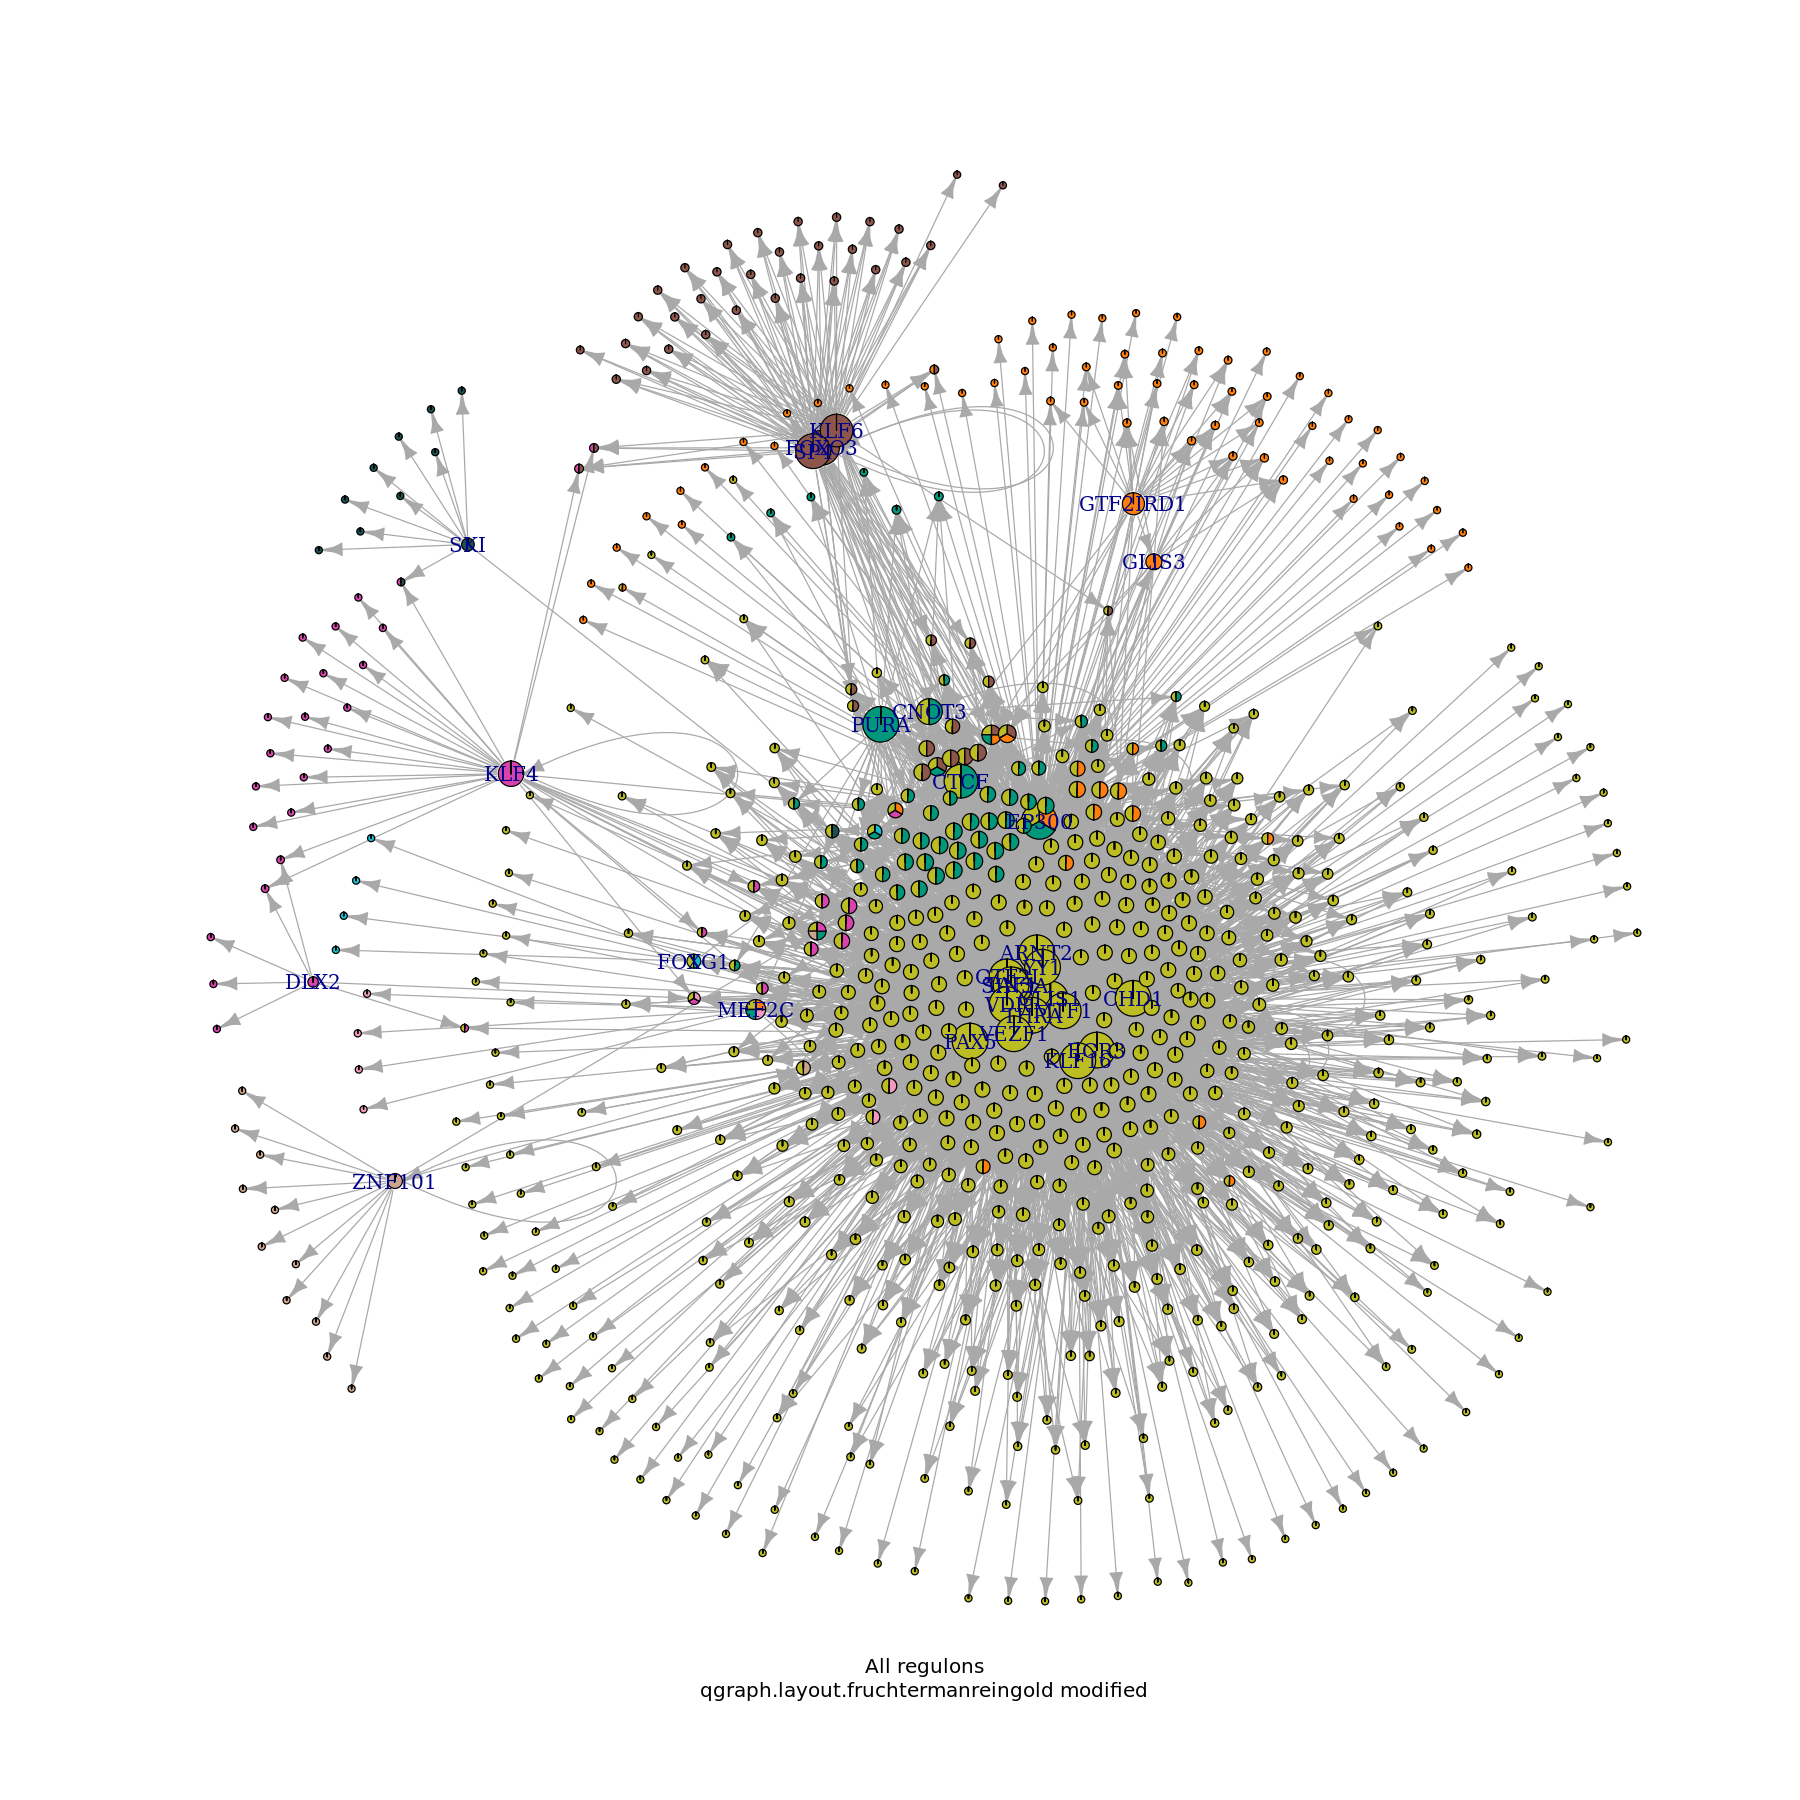

In [309]:
plot(g,layout=get_fr_layout(g, area.fct = 70, repulse.pwr = 3.5),
     vertex.shape="pie", 
     vertex.pie=lapply(V(g)$name, function(x){reg.values[x,]}),
     edge.arrow.size = 0.3,
     vertex.pie.color=list(meta.colors$Disease[colnames(reg.values)]),
     vertex.size=deg,
     vertex.label=ifelse(V(g)$name %in% unique(RCT$regulonTbl$Core), V(g)$name, NA)
    )
mtext("All regulons\nqgraph.layout.fruchtermanreingold modified", side=1)

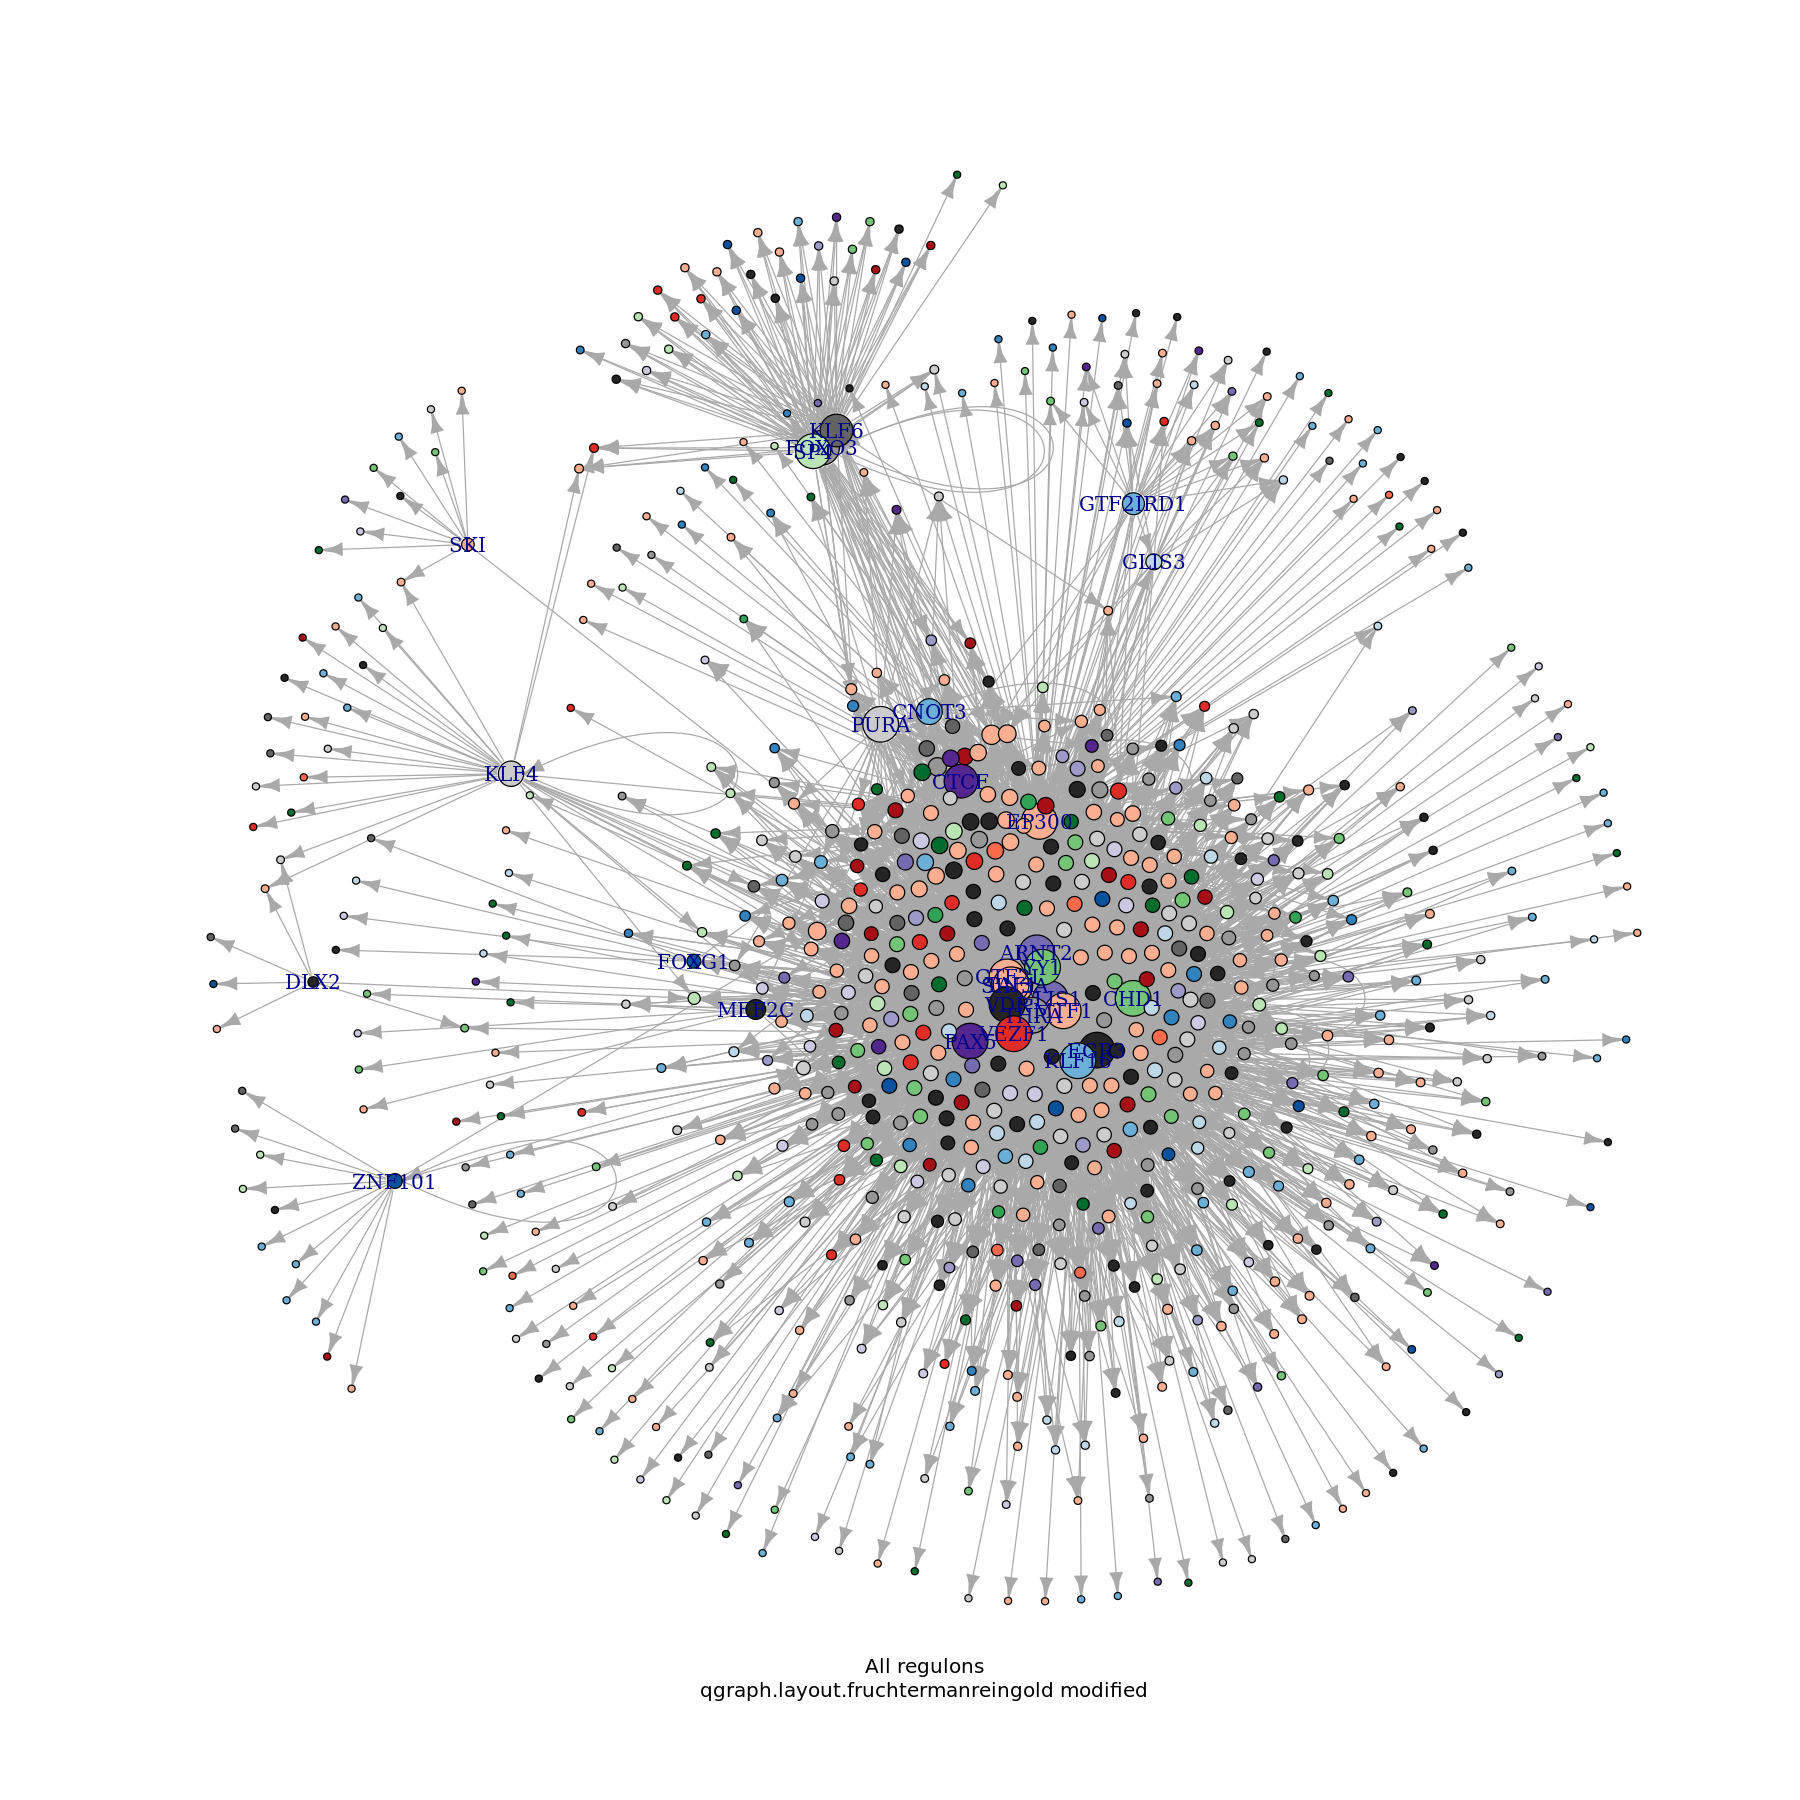

In [310]:
plot(g,layout=get_fr_layout(g, area.fct = 70, repulse.pwr = 3.5),
     edge.arrow.size = 0.3,
     vertex.size=deg,
     vertex.label=ifelse(V(g)$name %in% unique(RCT$regulonTbl$Core), V(g)$name, NA)
    )
mtext("All regulons\nqgraph.layout.fruchtermanreingold modified", side=1)